# Final Project - Advanced Topics in Deep Learning
Hello dear students,<br> this is the template notebook. Please click on the "File" tab and then on "Save a copy into drive".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:

### Goodluck!

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications import vgg19
! mkdir ../images
import shutil
import time
import random


!gdown --id 18WzMkgwOCZ7nzMhGM4j7fw9q6sJg4Hm7
!unzip /content/advNeuralstyleTransfer

# This chunk works.
!pip uninstall --yes gdown # After running this line, restart Colab runtime.

!pip install gdown -U --no-cache-dir

import gdown

url = 'https://drive.google.com/drive/folders/18WzMkgwOCZ7nzMhGM4j7fw9q6sJg4Hm7?usp=sharing'

gdown.download_folder(url)


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=18WzMkgwOCZ7nzMhGM4j7fw9q6sJg4Hm7 

unzip:  cannot find or open /content/advNeuralstyleTransfer, /content/advNeuralstyleTransfer.zip or /content/advNeuralstyleTransfer.ZIP.
Found existing installation: gdown 4.6.4
Uninstalling gdown-4.6.4:
  Successfully uninstalled gdown-4.6.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Retrieving folder list


Processing file 1lqprCMcOkCQ9rEa-xTo_5eceF5U2nSsS model_weights.h5
Processing file 1pXU3UqsFX_ybdWYpx9AVqcUJopbxttyU modelfirst_weights.h5
Processing file 1fMADP6xUk6FwDXW3vOdIOgQ9BnA3DXEt modelsecond_weights.h5
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1lqprCMcOkCQ9rEa-xTo_5eceF5U2nSsS
To: /content/advNeuralstyleTransfer/model_weights.h5
100%|██████████| 61.3M/61.3M [00:01<00:00, 45.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pXU3UqsFX_ybdWYpx9AVqcUJopbxttyU
To: /content/advNeuralstyleTransfer/modelfirst_weights.h5
100%|██████████| 61.3M/61.3M [00:00<00:00, 185MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fMADP6xUk6FwDXW3vOdIOgQ9BnA3DXEt
To: /content/advNeuralstyleTransfer/modelsecond_weights.h5
100%|██████████| 61.3M/61.3M [00:00<00:00, 61.8MB/s]
Download completed


['/content/advNeuralstyleTransfer/model_weights.h5',
 '/content/advNeuralstyleTransfer/modelfirst_weights.h5',
 '/content/advNeuralstyleTransfer/modelsecond_weights.h5']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**load a dataset of cycle_gan/monet2photo**

In [ ]:
data,data_info = tfds.load('cycle_gan/monet2photo', download=True, with_info=True, shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteCKQJ12/cycle_gan-trainB.tfrecord*...…

Generating testA examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteCKQJ12/cycle_gan-testA.tfrecord*...:…

Generating testB examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0.incompleteCKQJ12/cycle_gan-testB.tfrecord*...:…

Dataset cycle_gan downloaded and prepared to /root/tensorflow_datasets/cycle_gan/monet2photo/2.0.0. Subsequent calls will reuse this data.


**resize the size of image from 320 to 256**

In [ ]:
def imresize(image):
    image = tf.image.resize(image['image'], (256,256))
    return image


In [ ]:
train_monet, train_photos, test_monet, test_photos= data['trainA'], data['trainB'], data['testA'], data['testB']
train_monet=train_monet.map(imresize).cache().shuffle(64).batch(1)
train_photos=train_photos.map(imresize).cache().shuffle(64).batch(1)

**Visualize images and labels from an image classification dataset**

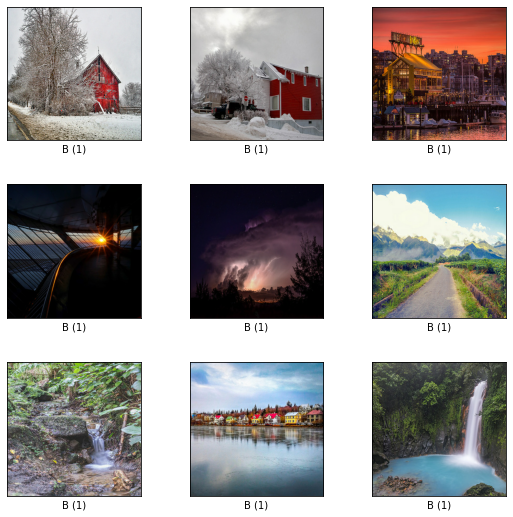

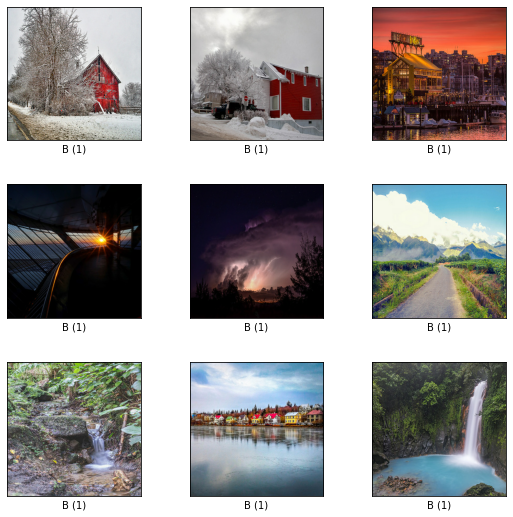

In [ ]:
tfds.visualization.show_examples(data['trainB'],data_info)

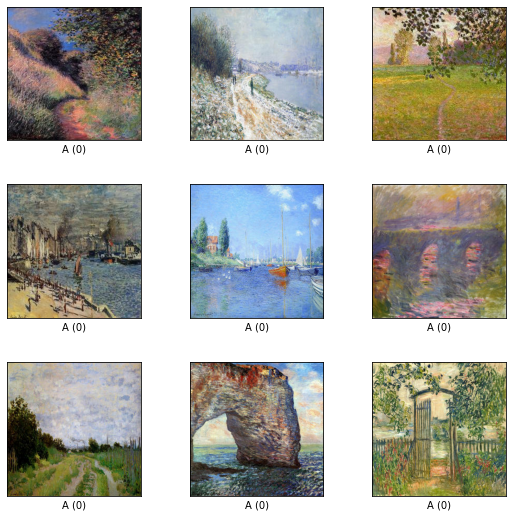

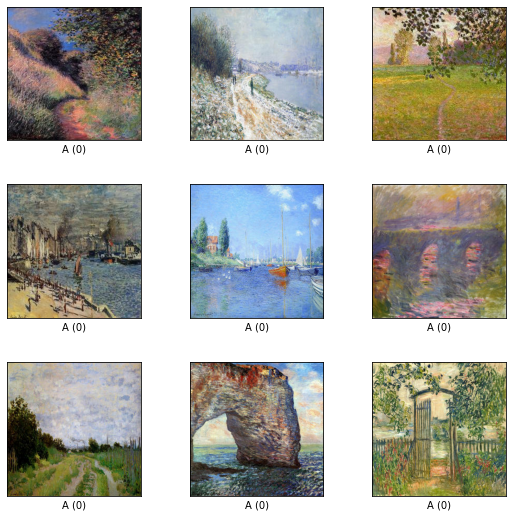

In [ ]:
tfds.visualization.show_examples(data['trainA'],data_info)


In [ ]:
vgg_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
vgg_model.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
content_layers = ['block5_conv2']
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']


In [ ]:
def my_model(layer_names):
    # Retrieve the output layers corresponding to the content and style layers
    vgg_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg_model.trainable = False
    outputs = [vgg_model.get_layer(name).output for name in layer_names]
    model=tf.keras.Model([vgg_model.input], outputs)
    # model.summary()
    return model

In [ ]:
#The goal is:Takes an input tensor,
#flattens it, computes the gram matrix by matrix multiplication and transpose,
#and normalizes it by the total number of spatial locations in the input tensor.

def gram_matrix(input_tensor):
    channels = tf.shape(input_tensor)[-1]
    flattened = tf.reshape(input_tensor, [-1, channels])
    result = tf.matmul(flattened, flattened, transpose_a=True)
    num_locations = tf.cast(tf.shape(input_tensor)[1]*tf.shape(input_tensor)[2], tf.float32)
    return result / (num_locations)
  


In [ ]:
class entire_model(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(entire_model, self).__init__()
        self.vgg=my_model(style_layers + content_layers)
        self.style_layers=style_layers
        self.content_layers=content_layers
        self.num_style_layers=len(style_layers)
        self.vgg.trainable=False

    def call(self, inputs):
        inputs=inputs
        preprocessed_input=tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs=self.vgg(preprocessed_input)# Pass the preprocessed input to my_model

        # Separate the representations of style and content
        style_outputs, content_outputs=(outputs[:self.num_style_layers], outputs[self.num_style_layers:])
        # Calculate the gram matrix for each layer in the style output. This will be the final style representation
        style_outputs=[gram_matrix(layer) for layer in style_outputs]

        # Store the content and style representation in dictionaries in a layer by layer manner
        content_dict = {content_name:value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

        style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}
        # Returns a dict of dicts with content and style representations, i.e., gram matrix of the style_layers and
        # the content of the content_layers

In [ ]:
#The goal is:These are the weights assigned to style and content loss for neural style transfer, 
#along with the specific weights assigned to each layer of the VGG19 network for style loss.
style_weight=1
content_weight=100
style_weights = {'block1_conv1': 0.3,
                 'block2_conv1': 0.45,
                 'block3_conv1': 0.15,
                 'block4_conv1': 0.05,
                 'block5_conv1': 0.05}

In [ ]:
# The function computes the total loss for neural style transfer by combining the style and content losses with appropriate weights. 
# It calculates the mean squared error between the output and target representations of each style and content layer. 
# The resulting loss value is returned.
def total_cost(outputs):
    style_outputs=outputs['style']
    content_outputs=outputs['content']
    style_loss=tf.add_n([style_weights[name]*tf.reduce_mean((style_outputs[name]-style_targets[name])**2)
                        for name in style_outputs.keys()])
    style_loss*=style_weight/len(style_layers)# Normalize

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2)
                             for name in content_outputs.keys()])
    content_loss*=content_weight/len(content_layers)
    loss=style_loss+content_loss
    return loss

In [ ]:
# This is a TensorFlow function that performs one training step in the neural style transfer process. 
# It computes the loss, calculates gradients and applies them to the input image using an optimizer.
# The function is optimized for performance using the @tf.function decorator.
@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = extractor(image)
        loss = total_cost(outputs)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))
    # print(outputs)
    return loss.numpy()

In [ ]:
#This command sets TensorFlow to run functions eagerly instead of in graph mode, 
#which can be useful for debugging and development purposes.
tf.config.run_functions_eagerly(True)

In [ ]:
#This code defines a function to display the content image, style image, and generated image side by side in a single plot, 
#and then calls this function with the input images and the number of training iterations.
from numpy import vstack
plt.rcdefaults()
def show_plot(imagesX, imagesY1, imagesY2,iter):
    images = vstack((imagesX, imagesY1, imagesY2))
    titles = ['Cotent', 'Style', 'Generated ']
    # scale from [-1,1] to [0,1]
    # plot images row by row
    for i in range(3):
        # define subplot
        plt.subplot(1, len(images), 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(images[i])
        # title
        plt.title(titles[i])
    # plt.savefig("gif/"+str(iter)+".jpg")
    plt.show()

**Similarity between two images.**

In [ ]:
#This function calculates the Structural Similarity Index (SSIM) loss between two images.
def LossSimilarity2Imges(y_true, y_pred):
  return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1))

  

**Base Model**

In [ ]:
total_loss=[]
total_ssim_content=[]
total_ssim_style=[]
num_of_images=300
num_iterations=15
for j in range(num_of_images):
    for im in train_photos.skip(random.randint(0,500)).take(1):
        content_img = (im.numpy()/255)
    for im in train_monet.skip(random.randint(0,500)).take(1):
        style_img = (im.numpy()/255)

    losses=[]
    content_ssim=[]
    style_ssim=[]
    extractor=entire_model(style_layers, content_layers)
    extractor.save_weights('/content/drive/MyDrive/model_weights.h5')
    style_targets = extractor(style_img)['style']
    content_targets = extractor(content_img)['content']
    generate_image = tf.Variable(content_img)
    opt =tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
    # Since this is a float image, define a function to keep the pixel values between 0 and 1
    def clip_0_1(image):
        return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

    start_time = time.time()
    print("[Photo Number:",j+1,"]")
    for i in range(num_iterations+1):
        loss=train_step(generate_image)
        c_ssim=LossSimilarity2Imges(content_img,generate_image.read_value()).numpy()
        s_ssim=LossSimilarity2Imges(style_img,generate_image.read_value()).numpy()
        content_ssim.append(c_ssim)
        style_ssim.append(s_ssim)
        losses.append(loss)
        g_img=generate_image.read_value().numpy()
        # print("Iteration:",i,", Loss:",loss)
        # print("Content Loss:",LossSimilarity2Imges(content_img,g_img).numpy())
        # print("Style Loss:",LossSimilarity2Imges(style_img,g_img).numpy())

    print("Time: {:.2f} seconds".format( time.time() - start_time))        
    show_plot(content_img,style_img,g_img,i)
    total_loss.append(losses)
    total_ssim_content.append(content_ssim)
    total_ssim_style.append(style_ssim)

In [ ]:
print(total_loss[0])

[386684.9, 188992.56, 96041.31, 53393.21, 33574.664, 24027.447, 18953.95, 16092.019, 14698.592, 14525.261, 15434.966, 17068.072, 18927.592, 20519.742, 21562.168, 21910.896]


In [ ]:
extractor=entire_model(style_layers, content_layers)
extractor.built = True
extractor.summary()

Model: "entire_model_300"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_300 (Functional)      [(None, None, None, 64),  15304768  
                              (None, None, None, 128)            
                             , (None, None, None, 256            
                             ),                                  
                              (None, None, None, 512)            
                             , (None, None, None, 512            
                             ),                                  
                              (None, None, None, 512)            
                             ]                                   
                                                                 
Total params: 15,304,768
Trainable params: 0
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
extractor.load_weights('/content/advNeuralstyleTransfer/model_weights.h5')

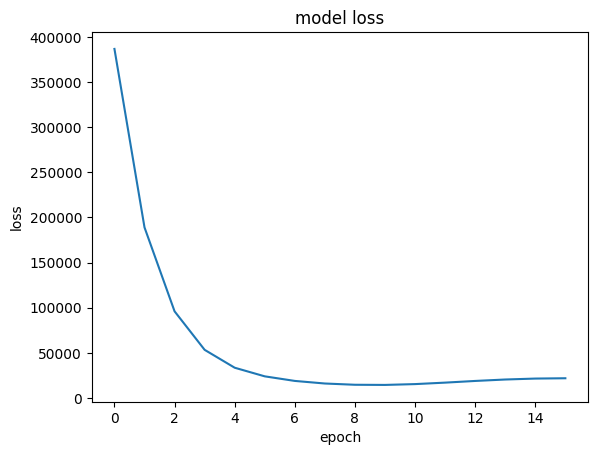

In [ ]:
from matplotlib import pyplot as plt
plt.plot(total_loss[0])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**First Experiment**

In [ ]:
total_loss=[]
total_ssim_content=[]
total_ssim_style=[]
num_of_images=200
for j in range(num_of_images):
    for im in train_photos.skip(random.randint(0,500)).take(1):
        content_img = (im.numpy()/255)
    for im in train_monet.skip(random.randint(0,500)).take(1):
        style_img = (im.numpy()/255)
#     style_img=style_train[j]
#     content_img=content_train[j]
    losses=[]
    content_ssim=[]
    style_ssim=[]
    extractor=entire_model(style_layers, content_layers)
    extractor.save_weights('/content/drive/MyDrive/modelfirst_weights.h5')
    style_targets = extractor(style_img)['style']
    content_targets = extractor(content_img)['content']
    generate_image = tf.Variable(content_img)
    opt  = tf.keras.optimizers.legacy.SGD(
    learning_rate=0.01,
    decay=1e-5,
    momentum=0.9,)
    # Since this is a float image, define a function to keep the pixel values between 0 and 1
    def clip_0_1(image):
        return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)
    
    num_iterations=15
    start_time = time.time()
    # opt.build([generate_image])
    print("[Photo Number:",j+1,"]")
    for i in range(num_iterations+1):
        loss=train_step(generate_image)
        if(i%25==0):
            c_ssim=LossSimilarity2Imges(content_img,generate_image.read_value()).numpy()
            s_ssim=LossSimilarity2Imges(style_img,generate_image.read_value()).numpy()
            content_ssim.append(c_ssim)
            style_ssim.append(s_ssim)
            losses.append(loss)
            g_img=generate_image.read_value().numpy()
    #         print("Iteration:",i,", Loss:",loss)
    #         print("Content Loss:",LossSimilarity2Imges(content_img,g_img).numpy())
    #         print("Style Loss:",LossSimilarity2Imges(style_img,g_img).numpy())
            
    # print("Time: {:.2f} seconds".format( time.time() - start_time))
    show_plot(content_img,style_img,g_img,i)
    # print("\n")
    total_loss.append(losses)
    total_ssim_content.append(content_ssim)
    total_ssim_style.append(style_ssim)
    # plt.imshow(g_img[0])
    # plt.axis('off')
    # plt.savefig("../images/" + str(j)+".jpg")

In [ ]:
extractor=entire_model(style_layers, content_layers)
extractor.built = True
extractor.summary()

Model: "entire_model_501"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_501 (Functional)      [(None, None, None, 64),  15304768  
                              (None, None, None, 128)            
                             , (None, None, None, 256            
                             ),                                  
                              (None, None, None, 512)            
                             , (None, None, None, 512            
                             ),                                  
                              (None, None, None, 512)            
                             ]                                   
                                                                 
Total params: 15,304,768
Trainable params: 0
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
extractor.load_weights('/content/advNeuralstyleTransfer/modelfirst_weights.h5')

In [ ]:
losses =[ item[0] for item in total_loss]
print(losses)

[38507.543, 318198.7, 193481.33, 261280.98, 76274.555, 62210.477, 96975.73, 32490.104, 154718.42, 148416.75, 17082.08, 87819.82, 19629.467, 84821.555, 109145.95, 69810.54, 102559.7, 4112266.0, 38159.316, 129029.336, 303471.47, 96155.68, 183372.44, 86226.195, 36880.08, 79884.33, 15612.784, 6631.4062, 12641.808, 2221221.0, 17545.293, 109675.99, 24708.447, 19417.336, 31947.135, 67248.414, 121261.055, 31920.404, 251193.33, 68311.75, 18604.54, 190970.94, 41866.867, 182286.11, 84548.9, 100101.086, 92911.39, 11575.67, 137124.9, 22742.895, 247893.25, 7379.185, 86134.375, 380280.47, 71440.125, 87953.586, 31962.107, 27065.244, 19475.752, 17881.02, 371131.62, 87760.0, 45640.55, 75207.414, 85834.99, 52069.887, 30097.75, 108023.805, 247663.17, 339985.88, 260749.38, 105401.85, 28749.51, 38900.54, 500631.8, 56193.0, 34608.87, 213535.67, 79788.69, 11405.1455, 128888.125, 12919.582, 50227.99, 15760.755, 34462.49, 375504.22, 38311.688, 30194.691, 34462.49, 171533.81, 97165.305, 87535.81, 131140.92, 2828

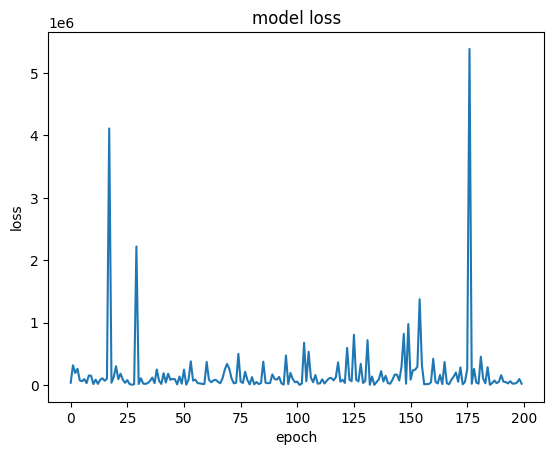

In [ ]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Second** **Experiment** 

In [ ]:
style_weight=50
content_weight=50
style_weights = {'block1_conv1': 0.3,
                 'block2_conv1': 0.45,
                 'block3_conv1': 0.15,
                 'block4_conv1': 0.05,
                 'block5_conv1': 0.05}

In [ ]:
total_loss=[]
total_ssim_content=[]
total_ssim_style=[]
num_of_images=200

In [ ]:
for j in range(num_of_images):
    for im in train_photos.skip(random.randint(0,500)).take(1):
        content_img = (im.numpy()/255)
    for im in train_monet.skip(random.randint(0,500)).take(1):
        style_img = (im.numpy()/255)
    losses=[]
    content_ssim=[]
    style_ssim=[]
    extractor=entire_model(style_layers, content_layers)
    extractor.save_weights('/content/drive/MyDrive/modelsecond_weights.h5')
    style_targets = extractor(style_img)['style']
    content_targets = extractor(content_img)['content']
    generate_image = tf.Variable(content_img)
    opt =tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
    # Since this is a float image, define a function to keep the pixel values between 0 and 1
    def clip_0_1(image):
        return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)
    
    num_iterations=15
    start_time = time.time()
    print("[Photo Number:",j+1,"]")
    for i in range(num_iterations+1):
        loss=train_step(generate_image)
        if(i%25==0):
            c_ssim=LossSimilarity2Imges(content_img,generate_image.read_value()).numpy()
            s_ssim=LossSimilarity2Imges(style_img,generate_image.read_value()).numpy()
            content_ssim.append(c_ssim)
            style_ssim.append(s_ssim)
            losses.append(loss)
            g_img=generate_image.read_value().numpy()
            # print("Iteration:",i,", Loss:",loss)
            # print("Content Loss:",LossSimilarity2Imges(content_img,g_img).numpy())
            # print("Style Loss:",LossSimilarity2Imges(style_img,g_img).numpy())

    print("Time: {:.2f} seconds".format( time.time() - start_time))
    show_plot(content_img,style_img,g_img,i)
    total_loss.append(losses)
    total_ssim_content.append(content_ssim)
    total_ssim_style.append(style_ssim)

In [ ]:
extractor=entire_model(style_layers, content_layers)
extractor.built = True
extractor.summary()

Model: "entire_model_702"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_702 (Functional)      [(None, None, None, 64),  15304768  
                              (None, None, None, 128)            
                             , (None, None, None, 256            
                             ),                                  
                              (None, None, None, 512)            
                             , (None, None, None, 512            
                             ),                                  
                              (None, None, None, 512)            
                             ]                                   
                                                                 
Total params: 15,304,768
Trainable params: 0
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
extractor.load_weights('/content/drive/MyDrive/modelsecond_weights.h5')

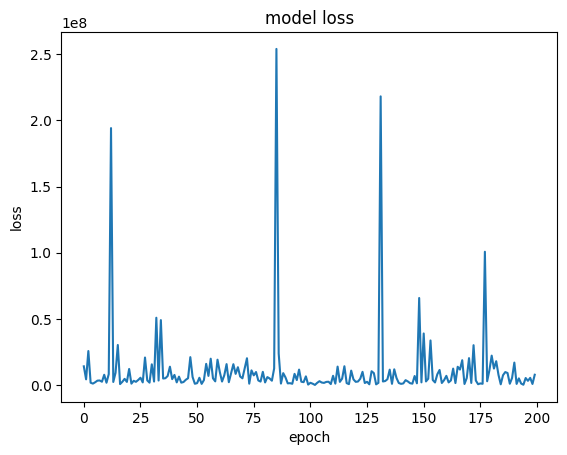

In [ ]:
from matplotlib import pyplot as plt
plt.plot(total_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()